In [ ]:
!pip install pandas


In [ ]:
import pandas as pd

### Loading dataset ###

In [ ]:
trans_data = pd.read_excel("/QVI_transaction_data.xlsx")

In [ ]:
trans_data.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


# Basic Information about the dataset

In [ ]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
trans_data.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [ ]:
trans_data.duplicated().sum()

np.int64(1)

# Changing the format of DATE column

In [ ]:
trans_data['DATE'] = pd.to_datetime(trans_data['DATE'],origin = '1899-12-30',unit = 'D')

In [ ]:
trans_data['DATE']

,DATE
0,2018-10-17
1,2019-05-14
2,2019-05-20
3,2018-08-17
4,2018-08-18
...,...
264831,2019-03-09
264832,2018-08-13
264833,2018-11-06
264834,2018-12-27


# Extracting New features from PROD_NAME

In [ ]:
trans_data['PROD_NAME'].head()

,PROD_NAME
0,Natural Chip Compny SeaSalt175g
1,CCs Nacho Cheese 175g
2,Smiths Crinkle Cut Chips Chicken 170g
3,Smiths Chip Thinly S/Cream&Onion 175g
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g


# Creating new columns PACK_SIZE and BRAND_NAME

In [ ]:
import re

In [ ]:
trans_data['PACK_SIZE'] = trans_data['PROD_NAME'].str.extract(r'(\d+)\s?g', expand=False)

In [ ]:
trans_data['PACK_SIZE'].astype(float)

,PACK_SIZE
0,175.0
1,175.0
2,170.0
3,175.0
4,150.0
...,...
264831,175.0
264832,175.0
264833,170.0
264834,150.0


In [ ]:
trans_data['BRAND_NAME'] = trans_data['PROD_NAME'].str.split().str[0]

In [ ]:
trans_data['BRAND_NAME']

,BRAND_NAME
0,Natural
1,CCs
2,Smiths
3,Smiths
4,Kettle
...,...
264831,Kettle
264832,Tostitos
264833,Doritos
264834,Doritos


# Filtering Chip product from PROD_NAME

In [ ]:
chips_only = trans_data[trans_data['PROD_NAME'].str.contains('chips',case=False,na = False)]

In [ ]:
chips_only

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths
14,2019-05-15,19,19272,16686,44,Thins Chips Light& Tangy 175g,1,3.3,175,Thins
33,2019-05-18,45,45220,41651,22,Thins Chips Originl saltd 175g,1,3.3,175,Thins
...,...,...,...,...,...,...,...,...,...,...
264809,2018-08-24,271,271051,268506,47,Doritos Corn Chips Original 170g,2,8.8,170,Doritos
264815,2018-11-04,271,271193,269365,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,Cobs
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,Cobs
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,Cobs


In [ ]:
trans_data = chips_only.reset_index(drop=True)


In [ ]:
trans_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
1,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths
2,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths
3,2019-05-15,19,19272,16686,44,Thins Chips Light& Tangy 175g,1,3.3,175,Thins
4,2019-05-18,45,45220,41651,22,Thins Chips Originl saltd 175g,1,3.3,175,Thins
...,...,...,...,...,...,...,...,...,...,...
49765,2018-08-24,271,271051,268506,47,Doritos Corn Chips Original 170g,2,8.8,170,Doritos
49766,2018-11-04,271,271193,269365,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,Cobs
49767,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,Cobs
49768,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,Cobs


In [ ]:
trans_data.drop(columns = ['PROD_NAME'],inplace = True)

In [ ]:
trans_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2019-05-20,1,1343,383,61,2,2.9,170,Smiths
1,2019-05-16,4,4149,3333,16,1,5.7,330,Smiths
2,2019-05-17,7,7215,7176,16,1,5.7,330,Smiths
3,2019-05-15,19,19272,16686,44,1,3.3,175,Thins
4,2019-05-18,45,45220,41651,22,1,3.3,175,Thins
...,...,...,...,...,...,...,...,...,...
49765,2018-08-24,271,271051,268506,47,2,8.8,170,Doritos
49766,2018-11-04,271,271193,269365,33,2,7.6,110,Cobs
49767,2019-05-29,271,271193,269366,75,2,7.6,110,Cobs
49768,2019-03-25,272,272194,269908,75,2,7.6,110,Cobs


# Loading purchare_behaviour dataset

In [ ]:
pur_data = pd.read_csv("/QVI_purchase_behaviour.csv")

In [ ]:
pur_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# Checking for nulls and duplicates


In [ ]:
pur_data.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [ ]:
pur_data.duplicated().sum()

np.int64(0)

# Merging two datasets

In [ ]:
merged_data = pd.merge(trans_data,pur_data,on = 'LYLTY_CARD_NBR',how = "inner")

In [ ]:
merged_data.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_QTY,0
TOT_SALES,0
PACK_SIZE,0
BRAND_NAME,0
LIFESTAGE,0


In [ ]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2019-05-20,1,1343,383,61,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
1,2019-05-16,4,4149,3333,16,1,5.7,330,Smiths,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-17,7,7215,7176,16,1,5.7,330,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2019-05-15,19,19272,16686,44,1,3.3,175,Thins,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-18,45,45220,41651,22,1,3.3,175,Thins,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
merged_data.to_csv("merged_customer_transactional_data.csv",index = False)

# Insights

# Total Sales By Brand Name

/tmp/ipython-input-3759214993.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_sales, x='BRAND_NAME', y='TOT_SALES', palette='viridis')


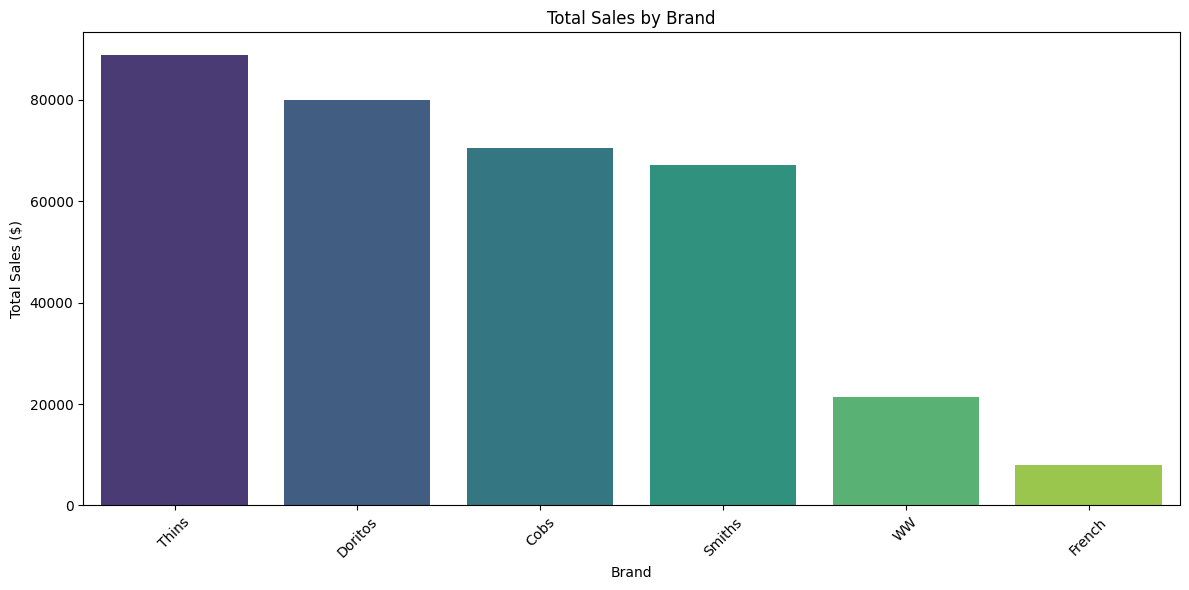

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Total sales per brand
brand_sales = merged_data.groupby('BRAND_NAME')['TOT_SALES'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=brand_sales, x='BRAND_NAME', y='TOT_SALES', palette='viridis')
plt.title('Total Sales by Brand')
plt.xticks(rotation=45)
plt.ylabel("Total Sales ($)")
plt.xlabel("Brand")
plt.tight_layout()
plt.show()



# Total Sales by Customer Segment

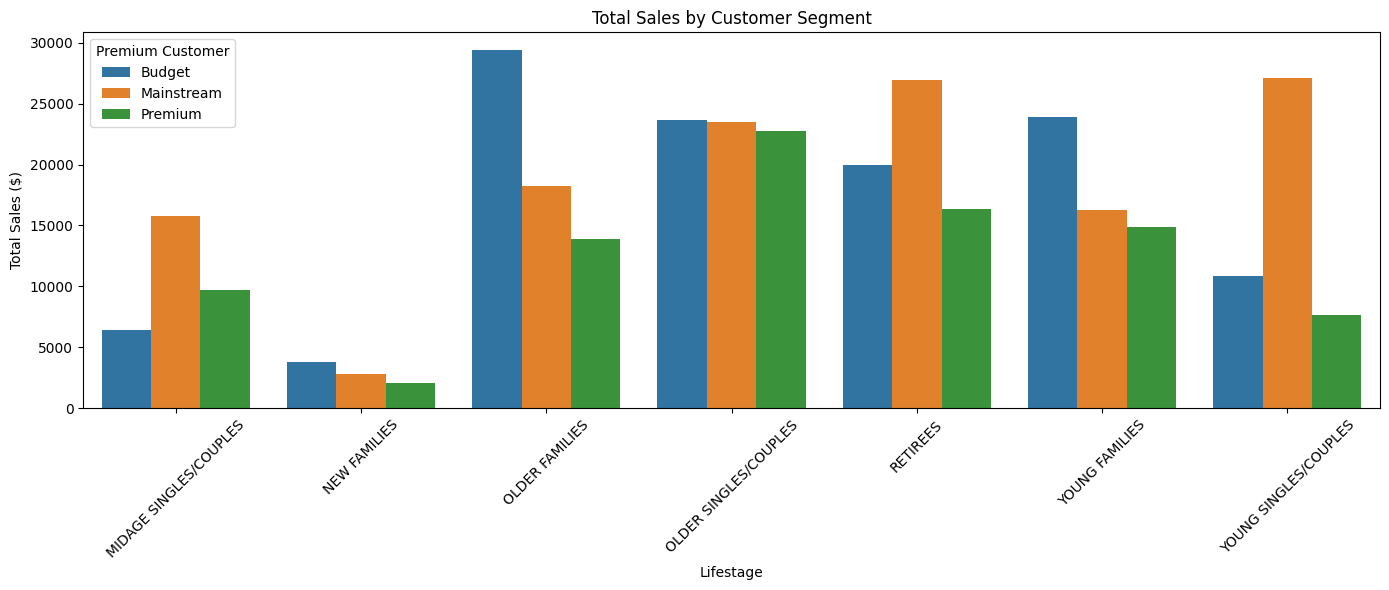

In [ ]:
segment_sales = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=segment_sales, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Total Sales by Customer Segment')
plt.ylabel("Total Sales ($)")
plt.xlabel("Lifestage")
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.show()


# Sales by Pack Size

/tmp/ipython-input-3308200157.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pack_sales, x='PACK_SIZE', y='TOT_SALES', palette='coolwarm')


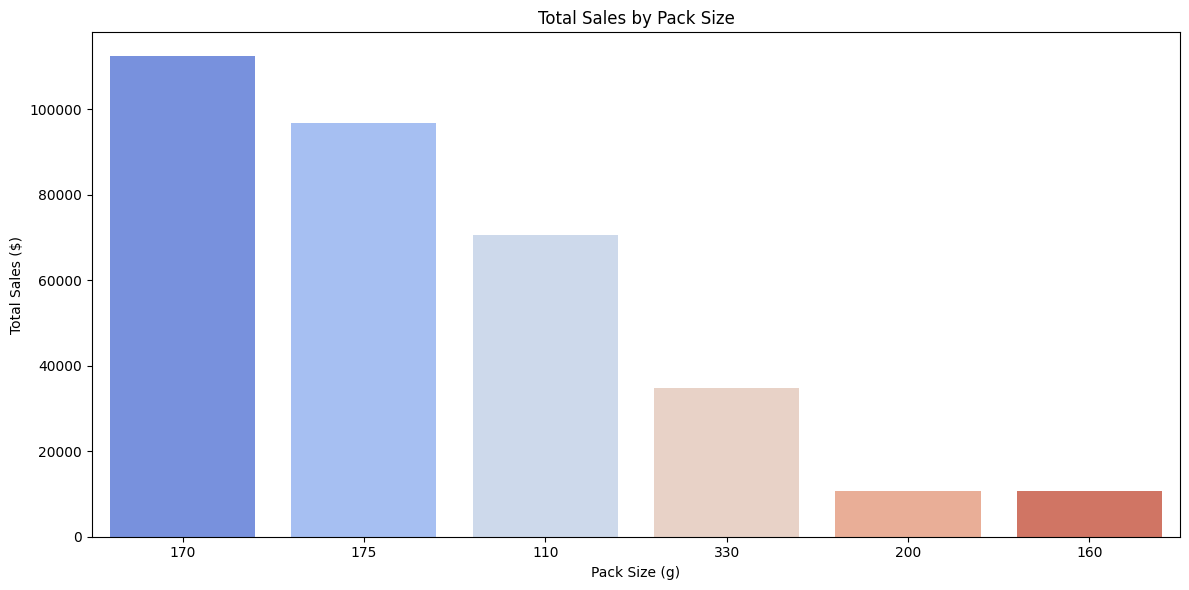

In [ ]:
pack_sales = merged_data.groupby('PACK_SIZE')['TOT_SALES'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=pack_sales, x='PACK_SIZE', y='TOT_SALES', palette='coolwarm')
plt.title('Total Sales by Pack Size')
plt.xlabel('Pack Size (g)')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()


# Average Spend per Transaction by Segment

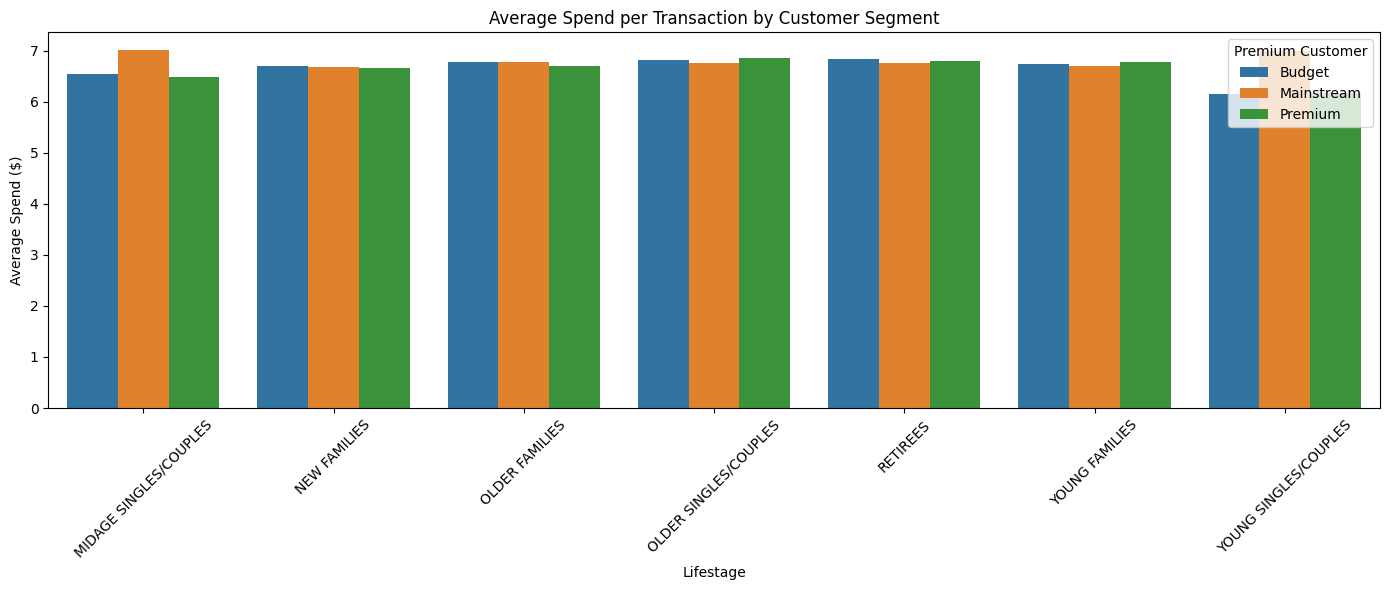

In [ ]:
avg_spend = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=avg_spend, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Average Spend per Transaction by Customer Segment')
plt.ylabel('Average Spend ($)')
plt.xlabel('Lifestage')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.show()
